# **EDA ON STREAMING PLATFORMS**  
I will be performing an Exploratory Data Analysis (EDA) on data from an online streaming platform (e.g., Netflix, Prime Video, Hulu, Disney+). The main goal of this analysis is to understand the structure, patterns, trends, and key insights hidden in the dataset.

# STEP 1:Import and Reading Data 

In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



In [320]:
df=pd.read_csv('/kaggle/input/tv-shows-on-netflix-prime-video-hulu-and-disney/tv_shows.csv')



# Step 2:Data Understanding

In [321]:
df.shape

(5368, 12)

In [322]:
df.head(10)

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1
5,5,6,Avatar: The Last Airbender,2005,7+,9.3/10,93/100,1,0,1,0,1
6,6,7,Peaky Blinders,2013,18+,8.8/10,93/100,1,0,0,0,1
7,7,8,The Walking Dead,2010,18+,8.2/10,93/100,1,0,0,0,1
8,8,9,Black Mirror,2011,18+,8.8/10,92/100,1,0,0,0,1
9,9,10,The Queen's Gambit,2020,18+,8.6/10,92/100,1,0,0,0,1


In [323]:
df.columns

Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type'],
      dtype='object')

In [324]:
df['IMDb'] =pd.to_numeric(df['IMDb'].str.split('/').str[0],errors='coerce')

df.head(5)


,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0,95/100,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8,94/100,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8,93/100,1,0,0,0,1


In [325]:
df['Rotten Tomatoes']=pd.to_numeric(df['Rotten Tomatoes'].str.split('/').str[0],errors='coerce')

In [326]:
df.dtypes


Unnamed: 0           int64
ID                   int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes      int64
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
dtype: object

# Step 3:Data Preperation

In [327]:
df1=df.drop(['Unnamed: 0','ID'],axis=1).copy()
df1

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater



,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,Breaking Bad,2008,18+,9.4,100,1,0,0,0,1
1,Stranger Things,2016,16+,8.7,96,1,0,0,0,1
2,Attack on Titan,2013,18+,9.0,95,1,1,0,0,1
3,Better Call Saul,2015,18+,8.8,94,1,0,0,0,1
4,Dark,2017,16+,8.8,93,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
5363,Paradise Islands,2017,NaN,NaN,10,0,0,0,1,1
5364,Mexico Untamed,2018,NaN,NaN,10,0,0,0,1,1
5365,Wild Centeral America,2020,NaN,NaN,10,0,0,0,1,1
5366,Wild Russia,2018,NaN,NaN,10,0,0,0,1,1


In [328]:
df1.isna().sum()

Title                 0
Year                  0
Age                2127
IMDb                962
Rotten Tomatoes       0
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
Type                  0
dtype: int64

In [329]:
df1.loc[df.duplicated()]

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type


In [330]:
df1.loc[df.duplicated(subset="Title")]

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type


# Step 4: Feature Understanding

In [331]:
df1["Year"].value_counts()

Year
2017    605
2018    562
2019    500
2020    489
2016    486
       ... 
1943      1
1932      1
1947      1
1904      1
1945      1
Name: count, Length: 78, dtype: int64

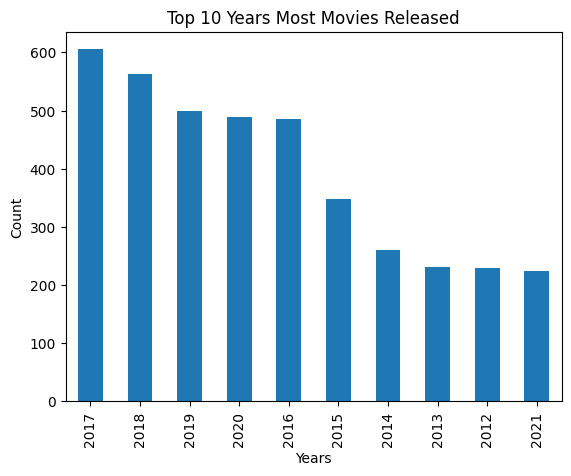

In [332]:
ax=df1['Year'].value_counts().head(10).plot(kind='bar',title="Top 10 Years Most Movies Released")
ax.set_xlabel("Years")
ax.set_ylabel("Count")
plt.show()

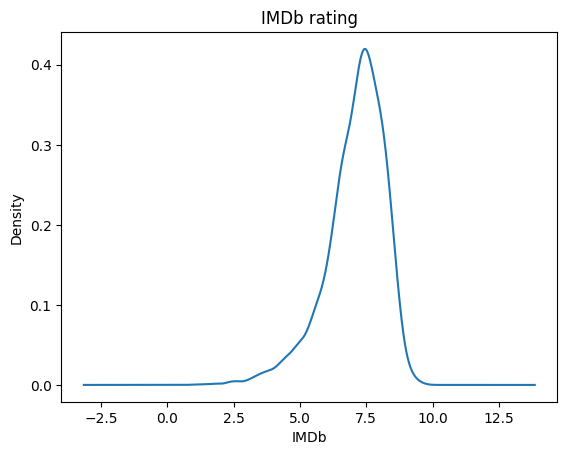

In [333]:
ax=df1['IMDb'].plot(kind="kde",title="IMDb rating")
ax.set_xlabel("IMDb")
plt.show()

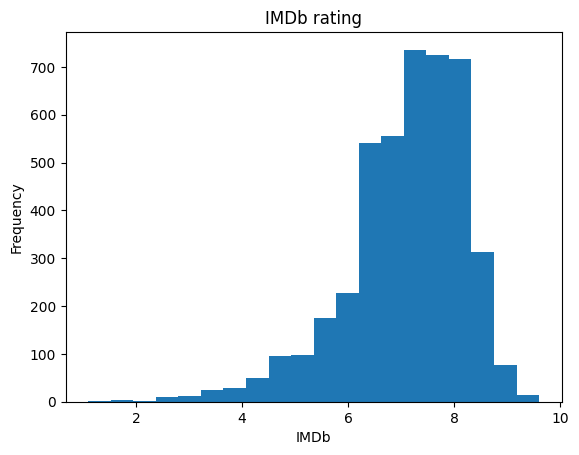

In [334]:
ax=df1['IMDb'].plot(kind="hist",bins=20,title="IMDb rating")
ax.set_xlabel("IMDb")
plt.show()

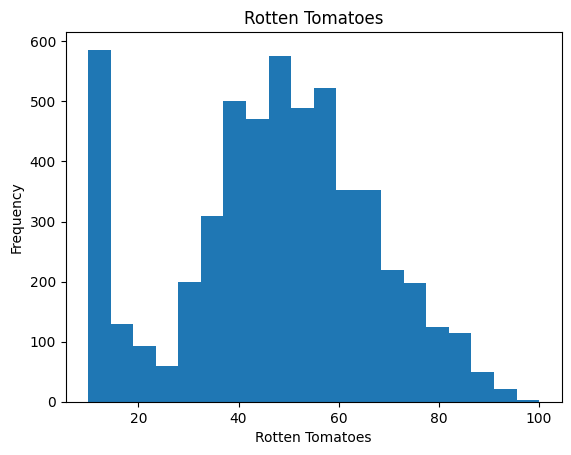

In [335]:
ax=df1['Rotten Tomatoes'].plot(kind="hist",bins=20,title="Rotten Tomatoes")
ax.set_xlabel("Rotten Tomatoes")
plt.show()

# Step 5: Feature Generation

In [336]:
cols = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
val_counts = df[cols].sum().reset_index()
val_counts.columns=['Platform','Count']
val_counts



,Platform,Count
0,Netflix,1971
1,Hulu,1621
2,Prime Video,1831
3,Disney+,351


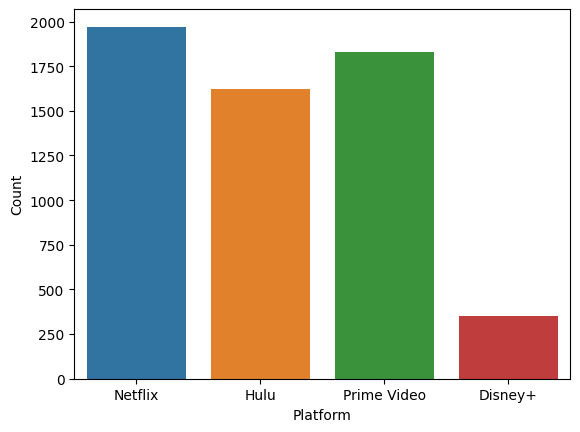

In [337]:
ax=sns.barplot(data=val_counts,x='Platform',y='Count')

In [338]:
# Netflix has the highest TV show count


# Which platform has the most IMDb rated TV shows

In [339]:
platform = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
avg_rate={}
for p in platform:
    filter_df=df1[df1[p]==1]
    avg_rating=filter_df["IMDb"].mean()
    avg_rate[p]=avg_rating
    
avg_df=pd.DataFrame.from_dict(avg_rate,orient='index',columns=['Avg_IMDb'])
avg_df.reset_index(inplace=True)
avg_df.columns=["Platform",'Avg_IMDb']
avg_df=avg_df.sort_values(by="Avg_IMDb",ascending=False).round(2)
avg_df
    

,Platform,Avg_IMDb
2,Prime Video,7.15
0,Netflix,7.11
1,Hulu,7.08
3,Disney+,6.97


In [340]:
# Prime has highest Average in IMDb rating

# Lets see Rotten Tomatoes

In [341]:
platform = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
avg_rate={}
for p in platform:
    filter_df=df1[df1[p]==1]
    avg_rating=filter_df["Rotten Tomatoes"].mean()
    avg_rate[p]=avg_rating
    
avg_df=pd.DataFrame.from_dict(avg_rate,orient='index',columns=['Avg_Rate'])
avg_df.reset_index(inplace=True)
avg_df.columns=["Platform",'Avg_Rate']
avg_df=avg_df.sort_values(by="Avg_Rate",ascending=False).round(2)
avg_df
    

,Platform,Avg_Rate
0,Netflix,53.56
1,Hulu,52.84
3,Disney+,49.42
2,Prime Video,37.76


In [342]:
# Netflix has the highest Average in Rotten Tomatoes

# Movies with the highest IMDb rating on each platform and genres

In [343]:
def sunburst(platform):
    filter_df = df1[df1[platform] == 1]
    filter_df = filter_df.sort_values(by='IMDb', ascending=False)
    rating = filter_df.head(10)

    fig = px.sunburst(
        rating,
        path=['Title'],  # Show Genre > Title hierarchy
        values='IMDb',
        color='IMDb',
        color_continuous_scale='amp',
    )

    fig.update_layout(title=f"Top 10 IMDb Titles on {platform}")
    fig.show()


In [348]:
sunburst("Netflix")

In [345]:
sunburst("Disney+")

In [346]:
sunburst("Prime Video")

In [347]:
sunburst("Hulu")